<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/methodological_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A lot of problems on leetcode are formulated like this:
Given an array of integers of size $\approx 10^5$, find a number that counts something.
It's farely easy to come up with the quadratic algo to find this number but this solution is TLE (Time Limit Exceeded). So you need to find another solution. This article explores the class of problems that allow linear solution.

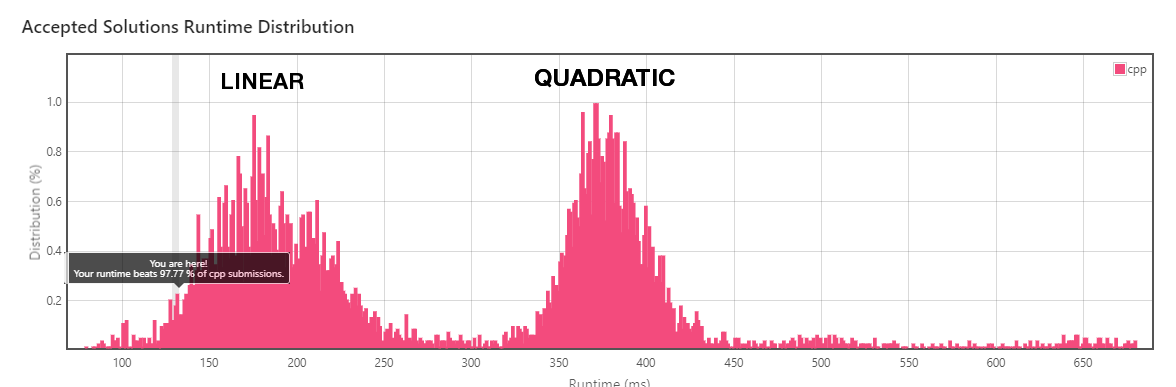

$$\rule{45cm}{0.4pt}$$

# From Quadratic to Linear


*   breathing window / two pointers
*   sliding window
*   Reformulation + memory hashmap
*   dp
*   don't simulate, try to do touch each element once, reuse the previous results
*   monotonic stack


# Breathing window












This class of problems asks for the number of subarrays that have a certain property. The subarray is characterised by a startpoint and an enpoint so you need a quadratic algo to explore every possible subarrays, right?

The property that we are asked about ensures that we do not need to explore every possible subarray. Namely for every endpoint $j$ the valid startpoints form a contiguous "window" $[i,j]$. When we proceed to the enpoint $j+1$ the valid startpoints region is $[\tilde{i},j]$ where $\tilde{i}\geq i$.

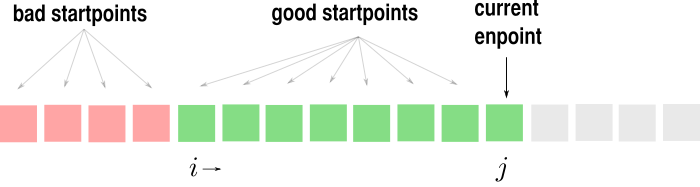

The two pointers $i,j$ and the "window" $[i,j]$ that can shrink or grow gives this algo a name.

[209. Minimum Size Subarray Sum](https://leetcode.com/problems/minimum-size-subarray-sum/discuss/1591291/2-solutions)


[904. Fruit Into Baskets](https://leetcode.com/problems/fruit-into-baskets/discuss/1358411/ok)

[930. Binary Subarrays With Sum](https://leetcode.com/problems/binary-subarrays-with-sum/discuss/1399254/2-solutions)

[1248. Count Number of Nice Subarrays](https://leetcode.com/problems/count-number-of-nice-subarrays/discuss/1140950/straightforward-(with-stl))


[1234. Replace the Substring for Balanced String](https://leetcode.com/problems/replace-the-substring-for-balanced-string/discuss/1366164/sliding-window/1944393)


[1855. Maximum Distance Between a Pair of Values](https://leetcode.com/problems/maximum-distance-between-a-pair-of-values/discuss/1218846/nice-gifs)

[1574. Shortest Subarray to be Removed to Make Array Sorted](https://leetcode.com/problems/shortest-subarray-to-be-removed-to-make-array-sorted/discuss/3847209/two-pointers)

nice one

# Sliding window

[2327. Number of People Aware of a Secret](https://leetcode.com/problems/number-of-people-aware-of-a-secret/discuss/3811265/sliding-window)

Sliding windows is a particular case of breathing window, where the breathing window has a fixed size it can only translate but not widen and shorten.

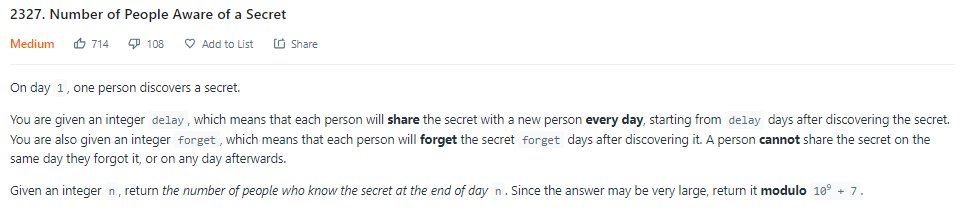

# Separability/reformulation + hashmap

[2364. Count Number of Bad Pairs](https://leetcode.com/problems/count-number-of-bad-pairs/discuss/3803330/ok)



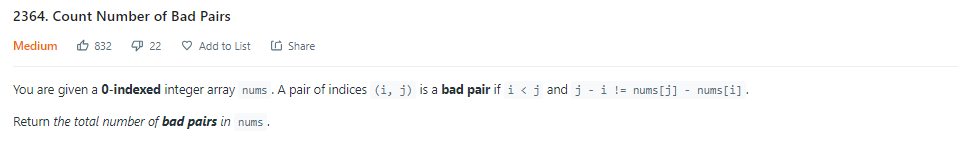

The problem asks the number of pairs of points that have a certain boolean $\text{propertyA}(p_1,p2)$ is $\text{True}$. This is a problem that needs a quardatic algo to explore all pairs.
But here:
$$
\text{propetyA}(p_1, p_2) = (\text{propetyB}(p_1)==\text{propetyB}(p_2)).
$$
where $\text{propetyB}(p_1)$ is integer valued property and we can reformulate the problem into counting the number of points that have the same $\text{propertyB}(p)$. If you use the hashmap it's a linear algo. So here the structure of $\text{propertyA}$ helps us to untangle it.

[1. Two Sum](https://leetcode.com/problems/two-sum/discuss/2806887/4-solutions)


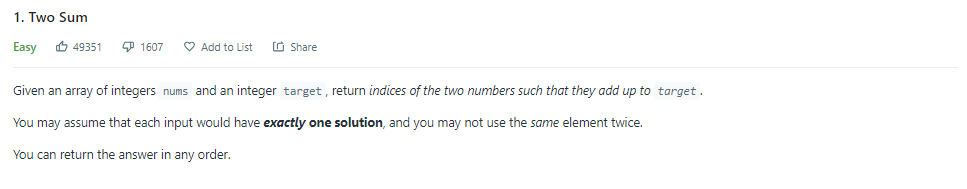

Here we have a condition to meet that involves two numbers:
$$n[i]+n[j]==T$$
If we were to check all pairs of numbers we would need a quadratic algo again.
We do the following instead.
Traverse the array and store $\text{target}-n[i]$ in hashmap $H$.
Now we need to find $n[i]$ that meet the condition
$$
n[i] \text{ is in H}.
$$
This is linear algo

# Dp

[53. Maximum Subarray](https://leetcode.com/problems/maximum-subarray/discuss/3756791/()-Kadane's-and-()-divideandconquer)

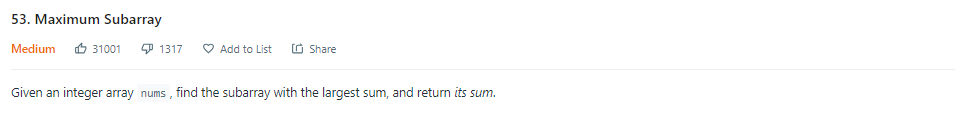

Again this is a problem that involves subarray. If we explore all subarrays we need a quadratic algo.
But we don't need to. The problem asks for the "optimal" subarray and this allows to implement the following algo:
It's easy to convince yourself that locally optimal subarray that ends at $j$ is either ${n[j]}$ or the optimal subarray that ends at $j-1$ with ${n[j]}$ attached to it. Globally optimal subarray is the max of the locally optimal subarrays. This observation enables linear algo as we don't have to explore all subarrays that end at $j$ but only two.

# Don't simulate, try to do touch each element once, reuse the previous results

[2810. Faulty Keyboard](https://leetcode.com/problems/faulty-keyboard/discuss/3871037/linear)

$$\rule{45cm}{0.4pt}$$


Sometimes you can come up with log-linear algo instead of quadratic one. Usually it involves some kind of sorting.

# From Quadratic to Log-Linear

* sorting + 2 pointers


# Sorting + 2 pointers

[2300. Successful Pairs of Spells and Potions](https://leetcode.com/problems/successful-pairs-of-spells-and-potions/discuss/3838010/index-array-sorting)

# Note on vectors

The vector's two endpoints (left and right) are not equivalent. It takes O(1) to do push_back and `O(N)` to do push_front. But taversing from right to left or from left to right require the same amount of work. That said  psychologically we are inclined to traverse an array from left to right, because the vector "starts" at the left and "ends" at the right and because we read text from left to the right. Some problems though are easier solved when we traverse an array from right to left instead!

[2810. Faulty Keyboard](https://leetcode.com/problems/faulty-keyboard/discuss/3871037/linear)

Here the problem is designed so that traversing drom right to left

[https://leetcode.com/problems/132-pattern/](https://leetcode.com/problems/132-pattern/discuss/3320446/2-solutions)

Here one of traversal renders easier solution

# Note on information handling

Algorithms are about information (besides everything else). By information I mean input data and numbers obtained from input data via simple calculations: function +, -, min/max etc.
Algorithms in procedural paradigm are local: you deal with one local bit of info (sometimes literally) at a time: one entry of an array, one node in a binary tree, one node in a graph.
The problems often seek some kind of object with global property though: longest subarray, number of "good" subarrays, shortest path, etc. In order to get sometimes global from many individual pieces we need to combine these pieces.

 So, when you get new piece of local info ask yourself how can you combine it with previously obtained or calculated info. Don't recalculate: reuse previously obtained(calculated) info (store it in vector or umap or stack if needed). Some previous info is useless and excessive or even harmful (slows the algo). If so, delete it (monotonic stack, rewrite value for a key in a umap). The concept of reusing the previous calculation is the key idea in dynamic programming.
 Often if asked about about optimal objects (largest sums, longest subarrays, etc) you need to store the optimal obect from all the previously encountered entries. Think about it: you need only one object to store, don't store all other objects !
 Example 1: Kadane algo when you need to store the largest sum of the subarray that ends at the previous entry.
Example 2: In two pointers there's a clear borderline between information that we may need in the future and the information that is no more useful.


# Note on the insightfulness

Often you are asked to simulate some kind of process that requires O(N^2) or O(2^N) time:
you are required to treverse an array, delete some of the entries and repeat this process unless we have one entry in an array.
Don't be fooled and do what you are asked! Don't do simple simulation!
Try to find a way how to find the answer without doing the actual simulation. This may require additional datastructures like stack or unordered map or vector. For example

[1997. First Day Where You Have Been in All the Rooms](https://leetcode.com/problems/first-day-where-you-have-been-in-all-the-rooms/discuss/3901222/dp)


# Note on the suggestive problem

Every datastructure should be presented via ONE suggestive problem - problem that could be solved most efficiently via that datastructure. This problem is figured out by the professor. For example let's take monotonic stack. How can we present it? Via the suggestive problem:
Given an array of numbers build the hierarchy of minima: find a way to find minimum and throw it away. After that you should find the next minimum and so on.
Another alternative for a suggestive problem:
[503. Next Greater Element II](https://leetcode.com/problems/next-greater-element-ii/)

# Note on physchology and metasolving

First lecture should have a pharagraph about the phycology of problem solving
* practice to become better!
* programming and math problemsolving are alike(books on problemsolving). Another similar activities: solving puzzles, brainteasers, performing magic tricks, creating art(music).
* while learning algos, learn your programming language - you can't write a poem if you don't know the language
* math
* * O-notation and complexity
* * what is a set, function/map
* * numbers, bits/binary operations, hex
* * elementary probability theory, bimomial coefficients
* * elementary combinatorics
* * formula for sum of arithmetic progression, formula for sum of geometric progression, formula for the sum of odd numbers
* * prime numbers, divisors, GCD, GCR, modulo algebra
* * elementary geometry: perimeter/area, rotations
* know you instruments
* * paper and pen
* * inkscape/paint/online paint/excel/Mathematica/online gifmaker
* * online services (convert to binary, prime number decomposition)
* complexity $O(N)=O(N-k)=O(N/k)$
* must know techniques -> this course
* positive thinking = failing is ok. Monitor and control you phcycological state don't panic, don't be nervous, don't be impatient
* * problem solving is finding a way of accomplishing a task with a given set of tools. Think of it - you are doing something that you initially don't know how to do. Isn't it cool? You like a machine that builds itself.
* * honesty: admit to yourself if you don't fully understand some part of you algo works, admit when you are tired, admit when you are out of ideas
* * endurance and phycological recharging. Take breaks(story about lord Hamilton), stay fed, hydrated, well-rested.
* * problem is not your foe
* * don't get discouraged by how good the others are
* * you are not stupid. Selfdeprication is counterproductive. What seemed difficult of even impossible at first will become trivial at the end. That's called personal growth.
* * every solution matters, explore solutions
* * explore your solving strategies
* problem solving is WORK (a bit of art). Ypu need to work on the solutions not just find it. Also it takes time and a certain number of failures to be good at problem solving.
* solving as gathering information about the problem. It's worse when you are out of ideas, not when they fail
* do constraints help or get the solving harder
* strategy of solving:
* * observe the pattern (if possible)
* * dimensionality reduction
* * wishful thinking, ommiting/adding constaints
* * test driven solving (try to solve one small example)
* * come up with bad algo ($N^2$) and try to improve it
* * reduction to the previously solved problems (subarrays -> probably two pointers)
* postproduction and understanding your own algo: refactoring and experimenting (if you found a solution - it's not the end)
* * code you wrote may be clever than you: explore it
* * try to break your code
* * trying to delete lines
* * duck programming
* * explore edgecases
* * dry runs
* * use of pictures and animations, the importance of explanations
* * try different methods even if one is successful (iteration/recursion, dfs/bfs)
* learning from others, drawing conclusions
* push the limit: one pass algos, one liners, use of functional programming(example: reverse string), delete code duplication/edgecases, minimal number of variables
* be passionate about problem solving
* * what problems/solutions you like and why
* * develop your set of "tricks"
* * try to find your style of programming
* * find your favourite youtuber(examples), book on algorithms
* the beauty of solutions: good solution = short, minimal edgecases, no code duplication, minimal +/- 1s
* reflection: analyse your mental blocks, assumptions, bad ideas
* what to do when you are stuck
* * get rest
* * reread the problem formulation AND space contraints (if available) - you may have tried to solve not what you were asked
* * start from stratch or persuit another approach (if you have it)
* * try to categorise testcases
* * try to remember problem that is vaugely resemblant
* * try to enumerate everything you know and trying to use it in the contest of the problem
* * duck programming
* * brainstorming, thinking outside of the box
* * ask for help
* remember the approaches that you have tried and why they failed. You may need to reuse them in a new setup
* There are no universal recommendations: you need to find your own way